In [1]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_SimplePie/'

In [3]:
final_df=pd.read_csv('SimplePie_MS_PerStep.csv')

In [4]:
filtered_water = final_df[final_df['Step'].str.strip() == 'Add water']
filtered_water
#C029 is not included

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
6,C002,28,Add water,329.647148,502.921514,505.883802,423.661252,728.400257,1309.677817,1045.173195,704.894875
17,C004,30,Add water,117.885608,100.990335,38.264498,44.909267,51.333230,247.049190,240.483979,132.865290
28,C005,46,Add water,83.657887,141.528330,137.890749,109.749575,297.866511,157.899588,123.943912,153.619908
39,C010,54,Add water,73.323611,108.266514,137.539111,116.855355,151.253066,250.349107,163.639957,121.165573
52,C014,32,Add water,309.058277,402.615949,698.749709,513.578641,890.398933,462.222211,399.909934,363.136431
63,C015,33,Add water,178.869424,245.497832,220.360858,208.987170,238.392150,480.055713,402.974862,307.540889
74,C018,50,Add water,101.151571,158.094248,266.901700,187.361620,321.150599,238.574214,150.059087,124.157694
85,C019,40,Add water,0.000000,80.126575,0.000000,45.907536,223.479588,0.000000,167.816392,115.468651
96,C022,32,Add water,174.132811,253.887137,264.460663,244.667075,279.273170,484.040647,331.992316,248.263299
107,C023,52,Add water,196.750273,236.297602,276.615357,241.404938,301.760801,410.348342,311.120305,236.695654


In [5]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_water = filtered_water.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_water.select_dtypes(include=['float64', 'int64']).columns
filtered_water[numerical_cols] = filtered_water[numerical_cols].replace(0, np.nan)

filtered_water[numerical_cols] = imputer.fit_transform(filtered_water[numerical_cols])
filtered_water

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
6,C002,28.0,Add water,329.647148,502.921514,505.883802,423.661252,728.400257,1309.677817,1045.173195,704.894875
17,C004,30.0,Add water,117.885608,100.990335,38.264498,44.909267,51.333230,247.049190,240.483979,132.865290
28,C005,46.0,Add water,83.657887,141.528330,137.890749,109.749575,297.866511,157.899588,123.943912,153.619908
39,C010,54.0,Add water,73.323611,108.266514,137.539111,116.855355,151.253066,250.349107,163.639957,121.165573
52,C014,32.0,Add water,309.058277,402.615949,698.749709,513.578641,890.398933,462.222211,399.909934,363.136431
63,C015,33.0,Add water,178.869424,245.497832,220.360858,208.987170,238.392150,480.055713,402.974862,307.540889
74,C018,50.0,Add water,101.151571,158.094248,266.901700,187.361620,321.150599,238.574214,150.059087,124.157694
85,C019,40.0,Add water,73.323611,80.126575,137.539111,45.907536,223.479588,250.349107,167.816392,115.468651
96,C022,32.0,Add water,174.132811,253.887137,264.460663,244.667075,279.273170,484.040647,331.992316,248.263299
107,C023,52.0,Add water,196.750273,236.297602,276.615357,241.404938,301.760801,410.348342,311.120305,236.695654


In [6]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Add Water',
    'HeadCamera Distance': 'HeadCamera Distance - Add Water',
    'LeftElbow Distance': 'LeftElbow Distance - Add Water',
    'LeftShoulder Distance': 'LeftShoulder Distance - Add Water',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Add Water',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Add Water',
    'RightElbow Distance': 'RightElbow Distance - Add Water',
    'RightShoulder Distance': 'RightShoulder Distance - Add Water'
}

# Rename columns
filtered_water = filtered_water.rename(columns=new_column_names)
filtered_water

,Participant,Block Design Raw Score,Step,Chest Distance - Add Water,HeadCamera Distance - Add Water,LeftElbow Distance - Add Water,LeftShoulder Distance - Add Water,MotionControllerLeft Distance - Add Water,MotionControllerRight Distance - Add Water,RightElbow Distance - Add Water,RightShoulder Distance - Add Water
6,C002,28.0,Add water,329.647148,502.921514,505.883802,423.661252,728.400257,1309.677817,1045.173195,704.894875
17,C004,30.0,Add water,117.885608,100.990335,38.264498,44.909267,51.333230,247.049190,240.483979,132.865290
28,C005,46.0,Add water,83.657887,141.528330,137.890749,109.749575,297.866511,157.899588,123.943912,153.619908
39,C010,54.0,Add water,73.323611,108.266514,137.539111,116.855355,151.253066,250.349107,163.639957,121.165573
52,C014,32.0,Add water,309.058277,402.615949,698.749709,513.578641,890.398933,462.222211,399.909934,363.136431
63,C015,33.0,Add water,178.869424,245.497832,220.360858,208.987170,238.392150,480.055713,402.974862,307.540889
74,C018,50.0,Add water,101.151571,158.094248,266.901700,187.361620,321.150599,238.574214,150.059087,124.157694
85,C019,40.0,Add water,73.323611,80.126575,137.539111,45.907536,223.479588,250.349107,167.816392,115.468651
96,C022,32.0,Add water,174.132811,253.887137,264.460663,244.667075,279.273170,484.040647,331.992316,248.263299
107,C023,52.0,Add water,196.750273,236.297602,276.615357,241.404938,301.760801,410.348342,311.120305,236.695654


In [7]:
tracker_columns = ['Chest Distance - Add Water', 'HeadCamera Distance - Add Water', 'LeftElbow Distance - Add Water', 'LeftShoulder Distance - Add Water',
                   'RightElbow Distance - Add Water', 'RightShoulder Distance - Add Water', 'MotionControllerLeft Distance - Add Water',
                   'MotionControllerRight Distance - Add Water']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_water, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_water[block_design_col], filtered_water[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_water, tracker_columns, block_design_col)
correlation_df

,Tracker,Correlation,P-value
0,Chest Distance - Add Water,-0.434111,0.120917
1,HeadCamera Distance - Add Water,-0.374450,0.187152
2,LeftElbow Distance - Add Water,-0.125689,0.668546
3,LeftShoulder Distance - Add Water,-0.321587,0.262205
4,RightElbow Distance - Add Water,-0.574891,0.031508
5,RightShoulder Distance - Add Water,-0.480177,0.082249
6,MotionControllerLeft Distance - Add Water,-0.149780,0.609299
7,MotionControllerRight Distance - Add Water,-0.463065,0.095419


In [8]:
#filtered_water.to_csv('SimplePie_AddWater.csv',index=False)

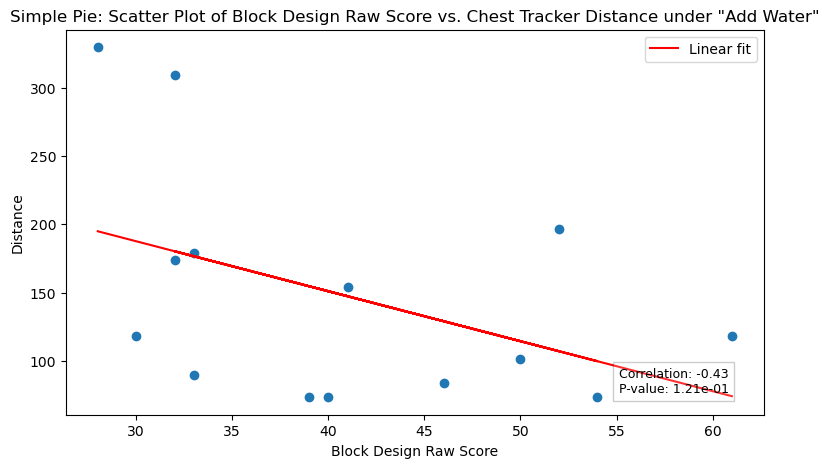

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

chest_df = filtered_water
correlation, p_value = spearmanr(chest_df['Block Design Raw Score'], chest_df['Chest Distance - Add Water'])
plt.figure(figsize=(9,5))
plt.scatter(chest_df['Block Design Raw Score'], chest_df['Chest Distance - Add Water'])

# Calculate linear fit
slope, intercept = np.polyfit(chest_df['Block Design Raw Score'], chest_df['Chest Distance - Add Water'], 1)
fit_line = slope * chest_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(chest_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Chest Tracker Distance under "Add Water"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '49 SP_WaterDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

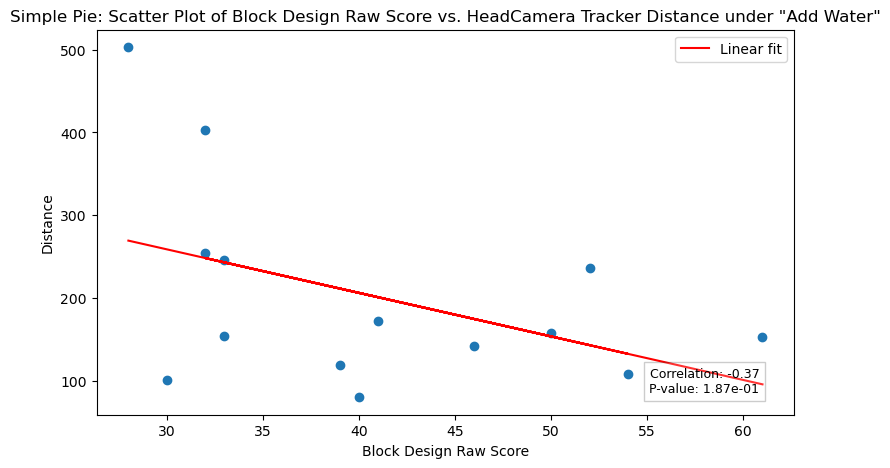

In [10]:
correlation, p_value = spearmanr(filtered_water['Block Design Raw Score'], filtered_water['HeadCamera Distance - Add Water'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_water['Block Design Raw Score'], filtered_water['HeadCamera Distance - Add Water'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_water['Block Design Raw Score'], filtered_water['HeadCamera Distance - Add Water'], 1)
fit_line = slope * filtered_water['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_water['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. HeadCamera Tracker Distance under "Add Water"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '50 SP_WaterDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

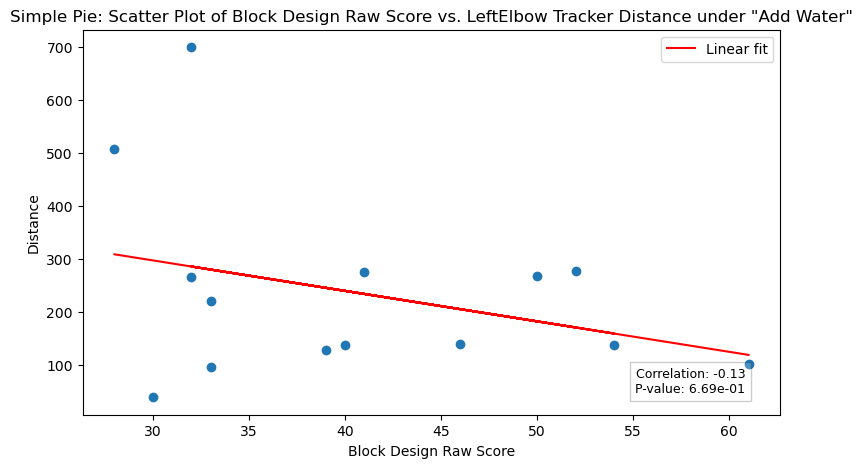

In [11]:
correlation, p_value = spearmanr(filtered_water['Block Design Raw Score'], filtered_water['LeftElbow Distance - Add Water'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_water['Block Design Raw Score'], filtered_water['LeftElbow Distance - Add Water'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_water['Block Design Raw Score'], filtered_water['LeftElbow Distance - Add Water'], 1)
fit_line = slope * filtered_water['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_water['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. LeftElbow Tracker Distance under "Add Water"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '52 SP_WaterDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

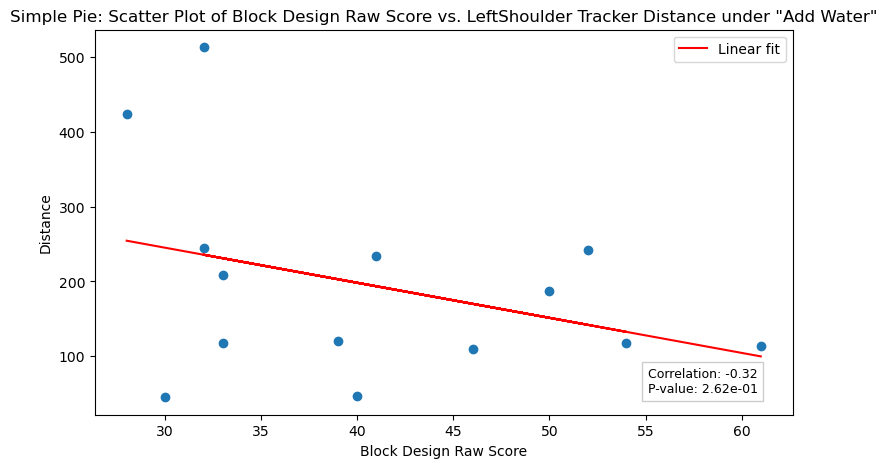

In [12]:
correlation, p_value = spearmanr(filtered_water['Block Design Raw Score'], filtered_water['LeftShoulder Distance - Add Water'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_water['Block Design Raw Score'], filtered_water['LeftShoulder Distance - Add Water'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_water['Block Design Raw Score'], filtered_water['LeftShoulder Distance - Add Water'], 1)
fit_line = slope * filtered_water['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_water['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. LeftShoulder Tracker Distance under "Add Water"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '53 SP_WaterDistanceLeftShouldr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

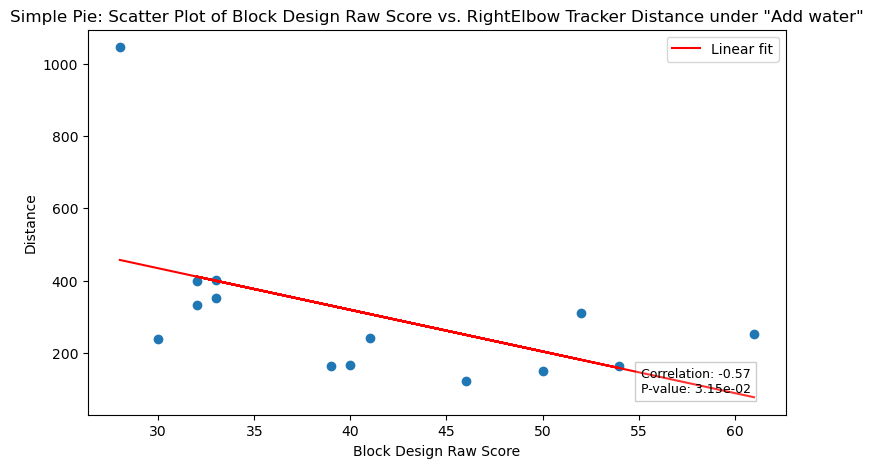

In [13]:
rightelbow_df = filtered_water
correlation, p_value = spearmanr(rightelbow_df['Block Design Raw Score'], rightelbow_df['RightElbow Distance - Add Water'])
plt.figure(figsize=(9,5))
plt.scatter(rightelbow_df['Block Design Raw Score'], rightelbow_df['RightElbow Distance - Add Water'])

# Calculate linear fit
slope, intercept = np.polyfit(rightelbow_df['Block Design Raw Score'], rightelbow_df['RightElbow Distance - Add Water'], 1)
fit_line = slope * rightelbow_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(rightelbow_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. RightElbow Tracker Distance under "Add water"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '51 SP_WaterDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

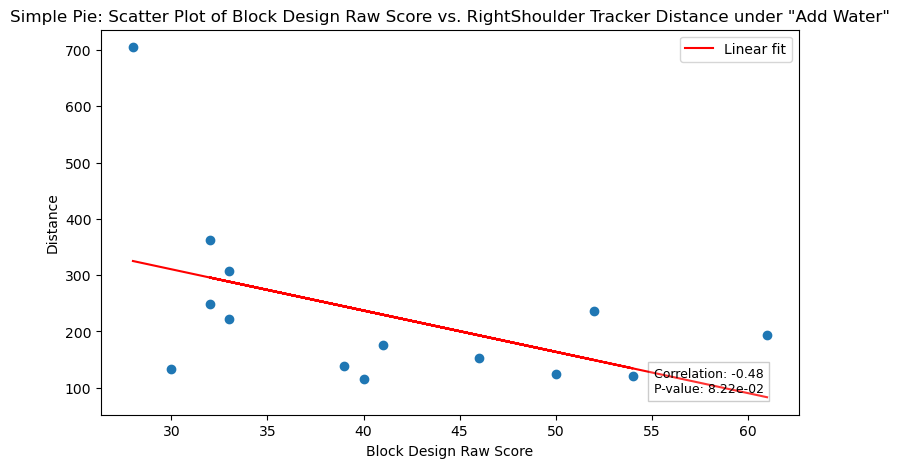

In [14]:
correlation, p_value = spearmanr(filtered_water['Block Design Raw Score'], filtered_water['RightShoulder Distance - Add Water'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_water['Block Design Raw Score'], filtered_water['RightShoulder Distance - Add Water'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_water['Block Design Raw Score'], filtered_water['RightShoulder Distance - Add Water'], 1)
fit_line = slope * filtered_water['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_water['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. RightShoulder Tracker Distance under "Add Water"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '54 SP_WaterDistanceRightShouldr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

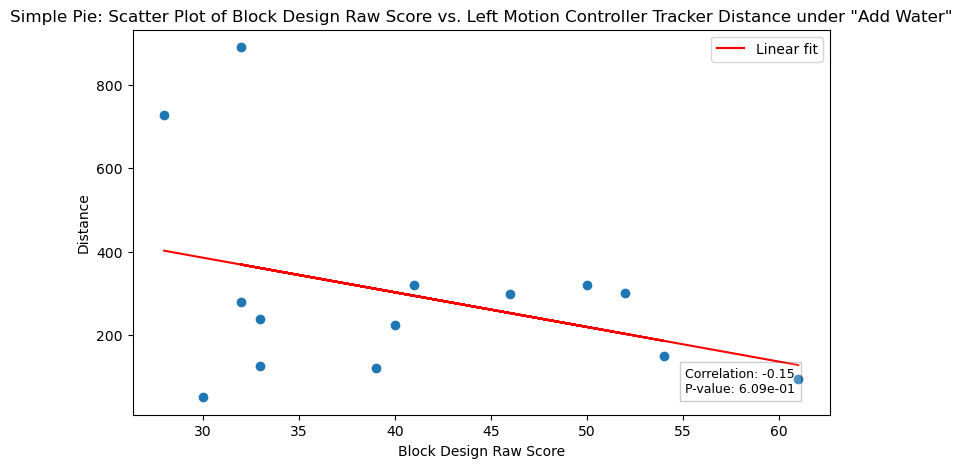

In [15]:
correlation, p_value = spearmanr(filtered_water['Block Design Raw Score'], filtered_water['MotionControllerLeft Distance - Add Water'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_water['Block Design Raw Score'], filtered_water['MotionControllerLeft Distance - Add Water'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_water['Block Design Raw Score'], filtered_water['MotionControllerLeft Distance - Add Water'], 1)
fit_line = slope * filtered_water['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_water['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Left Motion Controller Tracker Distance under "Add Water"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '55 SP_WaterDistanceLeftContrl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

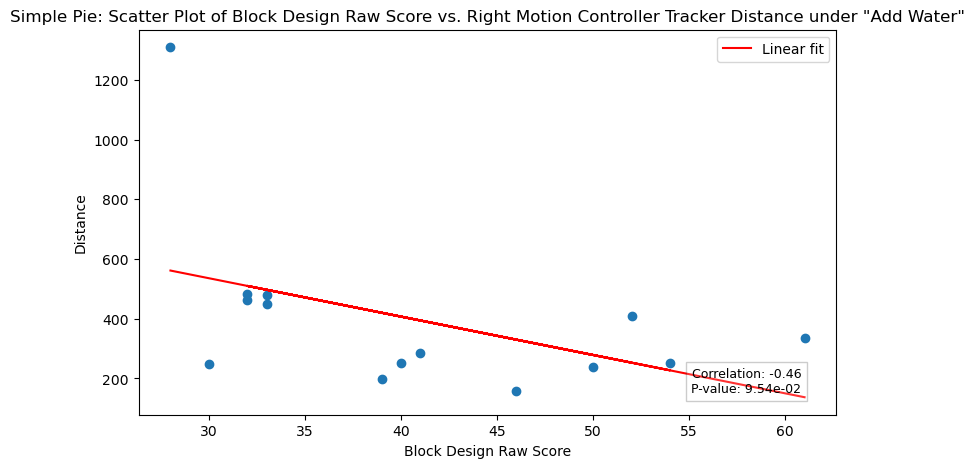

In [16]:
correlation, p_value = spearmanr(filtered_water['Block Design Raw Score'], filtered_water['MotionControllerRight Distance - Add Water'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_water['Block Design Raw Score'], filtered_water['MotionControllerRight Distance - Add Water'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_water['Block Design Raw Score'], filtered_water['MotionControllerRight Distance - Add Water'], 1)
fit_line = slope * filtered_water['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_water['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Right Motion Controller Tracker Distance under "Add Water"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '56 SP_WaterDistanceRightContrl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()